# 6 - Application of supervised learning

# Description du problème : 

Les détails suivants proviennent de la description du jeu de données Kaggle et de ce notebook:
https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer

## À propos du jeu de données 

Ce dataset regroupe les données du site internet online lung cancer prediction system. Ces données peuvent permettre de connaître son risque de cancer du poumon en fonction de plusieurs critères. 
Cela peut-être très utile dans le cadre d'une sensibilisation au cancer du poumon, ou alors pour prendre conscience que son mode de vie peut mener à des conséquences très néfastes.

## Contenu

Le jeu de données contient les caractéristiques suivantes : 
- Genre : H(omme) / F(emme)
- Age : L'age de l'individu
- Fumeur : Oui / Non
- Doigts Jaunes : Oui / Non
- Anxiété : Oui / Non
- Pression sociale : Oui / Non
- Maladie chronique: Oui / Non
- Fatigue : Oui / Non
- Allergie : Oui / Non
- Sibilance : Oui / Non
- Alcool : Oui / Non
- Toux : Oui / Non
- Respiration courte : Oui / Non
- Difficulté à avaler : Oui / Non
- Douleur thoracique : Oui / Non
- Cancer du poumon : Oui / Non

### Explications

Les "doigts jaunes" est un symptôme du fumeur. Les produits chimiques contenus dans les cigarettes peuvent colorer les doigts et les ongles en jaune. 
L'anxiété peut donner lieu au tabagisme, la pression sociale aussi, si tout son entourage fume ou s'ils nous encouragents à fumer. 
La sibilance correspond à un sifflement expiratoire, qui témoigne d'un rétrécissement ou d'une obstruction des bronches. 
La toux, la respiration courte sont des symptômes de la fumée qui est inhalée par le fumeur. 
La difficulté à avaler est symptômatique d'un risque de cancer de la gorge, favorisé par la cigarette et peut-être donc corrélée à un cancer du poumon.

# Importation des différentes librairies

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.inspection import permutation_importance


# Chargement et prétraitement du dataset

On encode le genre de l'individu, et on sépare la caractéristique cible des autres.

In [90]:
data = pd.read_csv('../data/Supervised_learning_datasets_ex6/survey lung cancer.csv')



In [91]:
data_cleaned = data.dropna()


# Visualisations sur le dataset

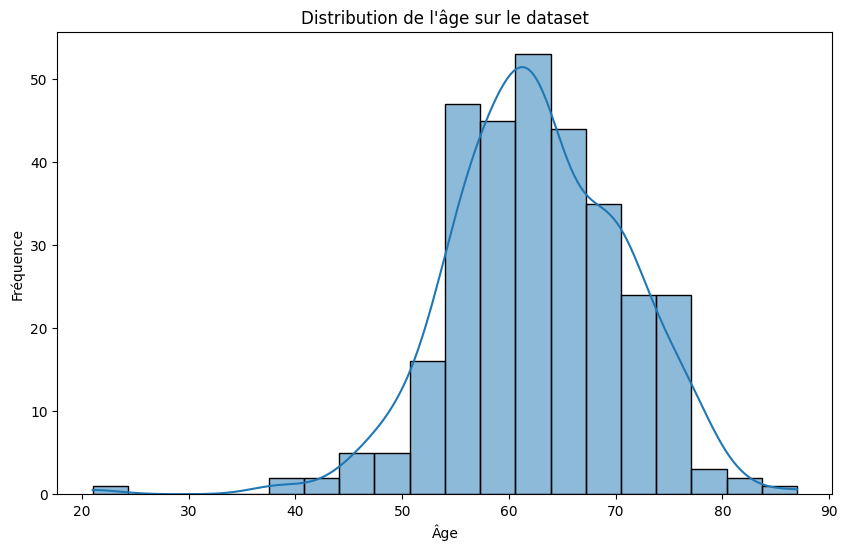

In [92]:
plt.figure(figsize=(10, 6))
sns.histplot(data['AGE'], kde=True, bins=20)
plt.title('Distribution de l\'âge sur le dataset')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

On peut voir que l'âge des patients recensé se situe aux alentours de 60 ans, âge où l'on peut commencer à prévenir le cancer du poumon.

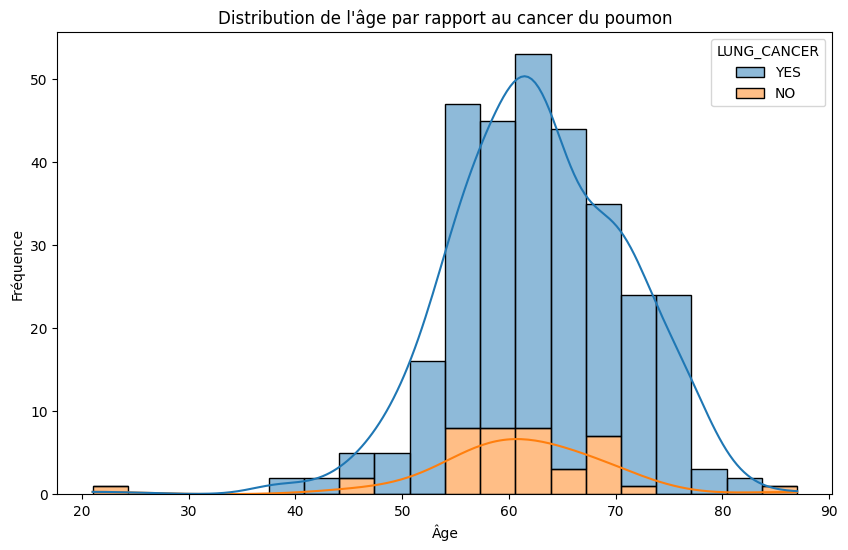

In [93]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='AGE', hue='LUNG_CANCER', multiple='stack', kde=True, bins=20)
plt.title('Distribution de l\'âge par rapport au cancer du poumon')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

Une majorité des patients de ce dataset ont un cancer du poumon, ce n'est pas équilibré et on verra que cela aura ses conséquences plus tard.

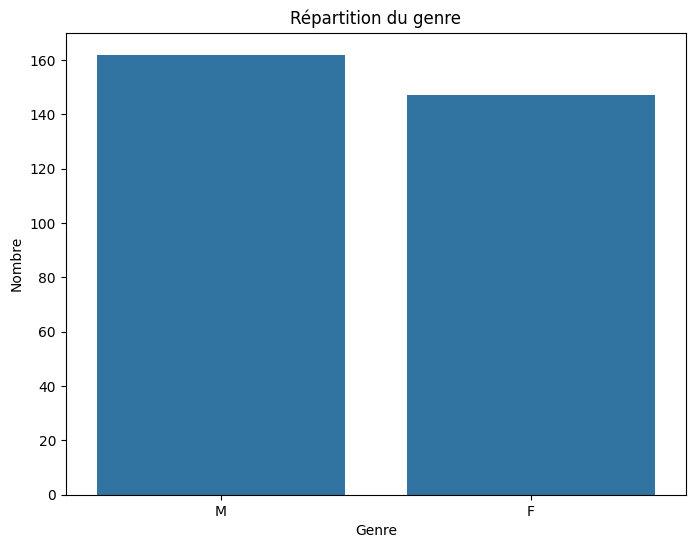

In [94]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='GENDER')
plt.title('Répartition du genre')
plt.xlabel('Genre')
plt.ylabel('Nombre')
plt.show()

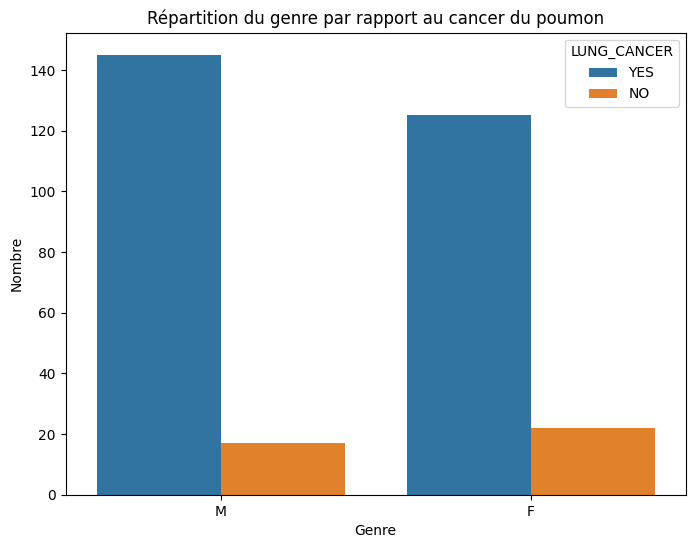

In [95]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='GENDER', hue='LUNG_CANCER')
plt.title('Répartition du genre par rapport au cancer du poumon')
plt.xlabel('Genre')
plt.ylabel('Nombre')
plt.show()

Les genres sont bien répartis.

## Préprocessing

Ici, on cherche à normaliser les données mais aussi à transformer la colonne genre et lung_cancer en int avec 1 ou 0 pour correspondre à toutes les autres colonnes. On split le dataset en train,val et test en stratifiant pour avoir une bonne répartition des deux classes dans chaque dataset. En effet, il n'y a que deux classes dont une majorité de cancer du poumon à TRUE.

In [96]:
le = LabelEncoder()
data_cleaned['GENDER'] = le.fit_transform(data_cleaned['GENDER'])
# Séparation des caractéristiques et de la cible
X = data_cleaned.drop('LUNG_CANCER', axis=1)
le = LabelEncoder()
y = le.fit_transform(data_cleaned['LUNG_CANCER'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
data = data_cleaned

# Autres visualisations

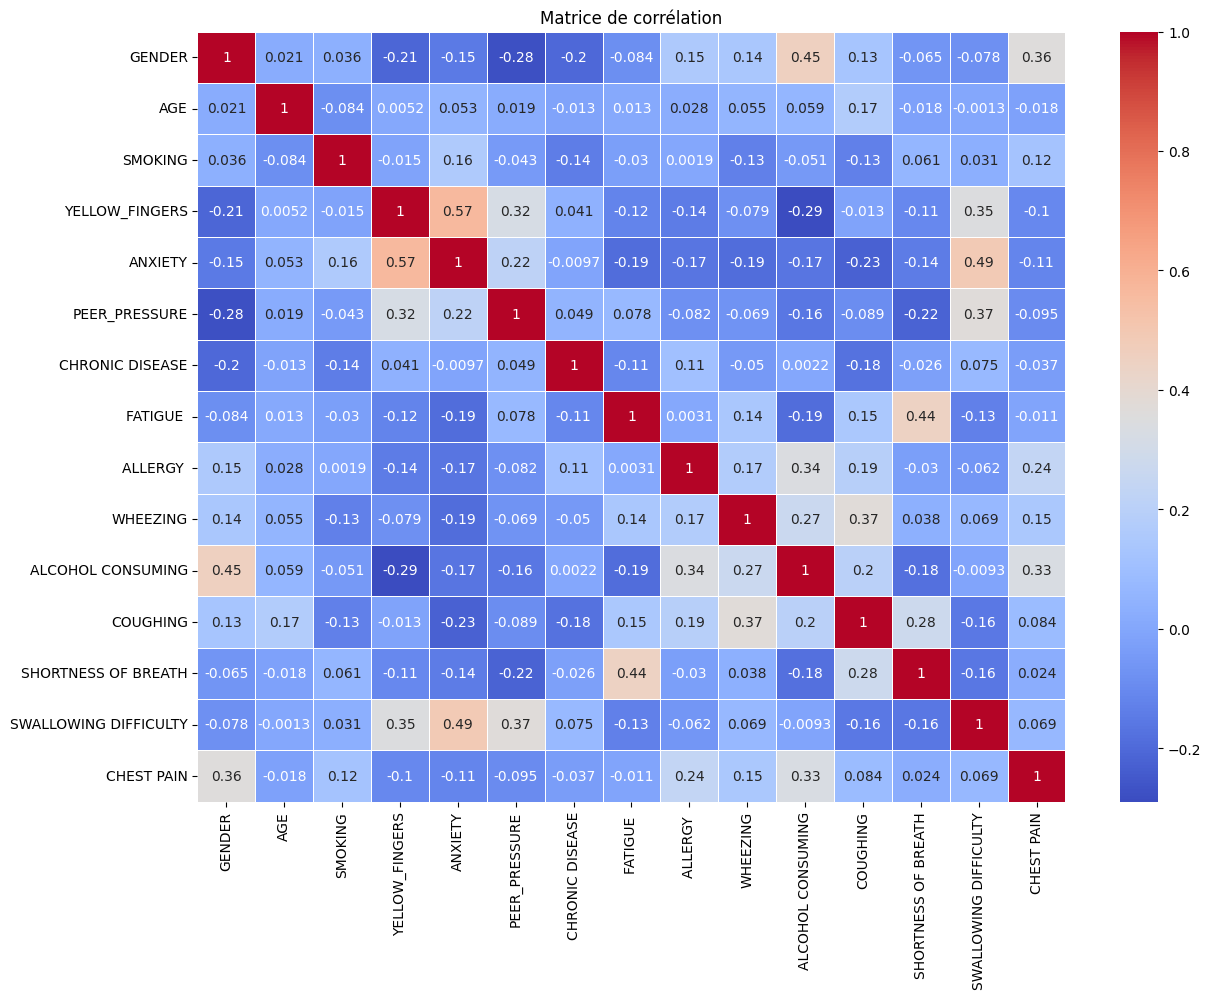

In [97]:
plt.figure(figsize=(14, 10))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

On peut voir un tableau montrant la corrélation entre les différentes caractéristiques qui mènent à un cancer du poumon. Certianes semblent logique au premier abord comme la consommation d'alcool et le genre (beaucoup d'hommes consomment de l'alcool par rapport au femmes), d'autres sont plus étonnantes, comme la corrélation entre l'anxiété et les "doigts jaunes".

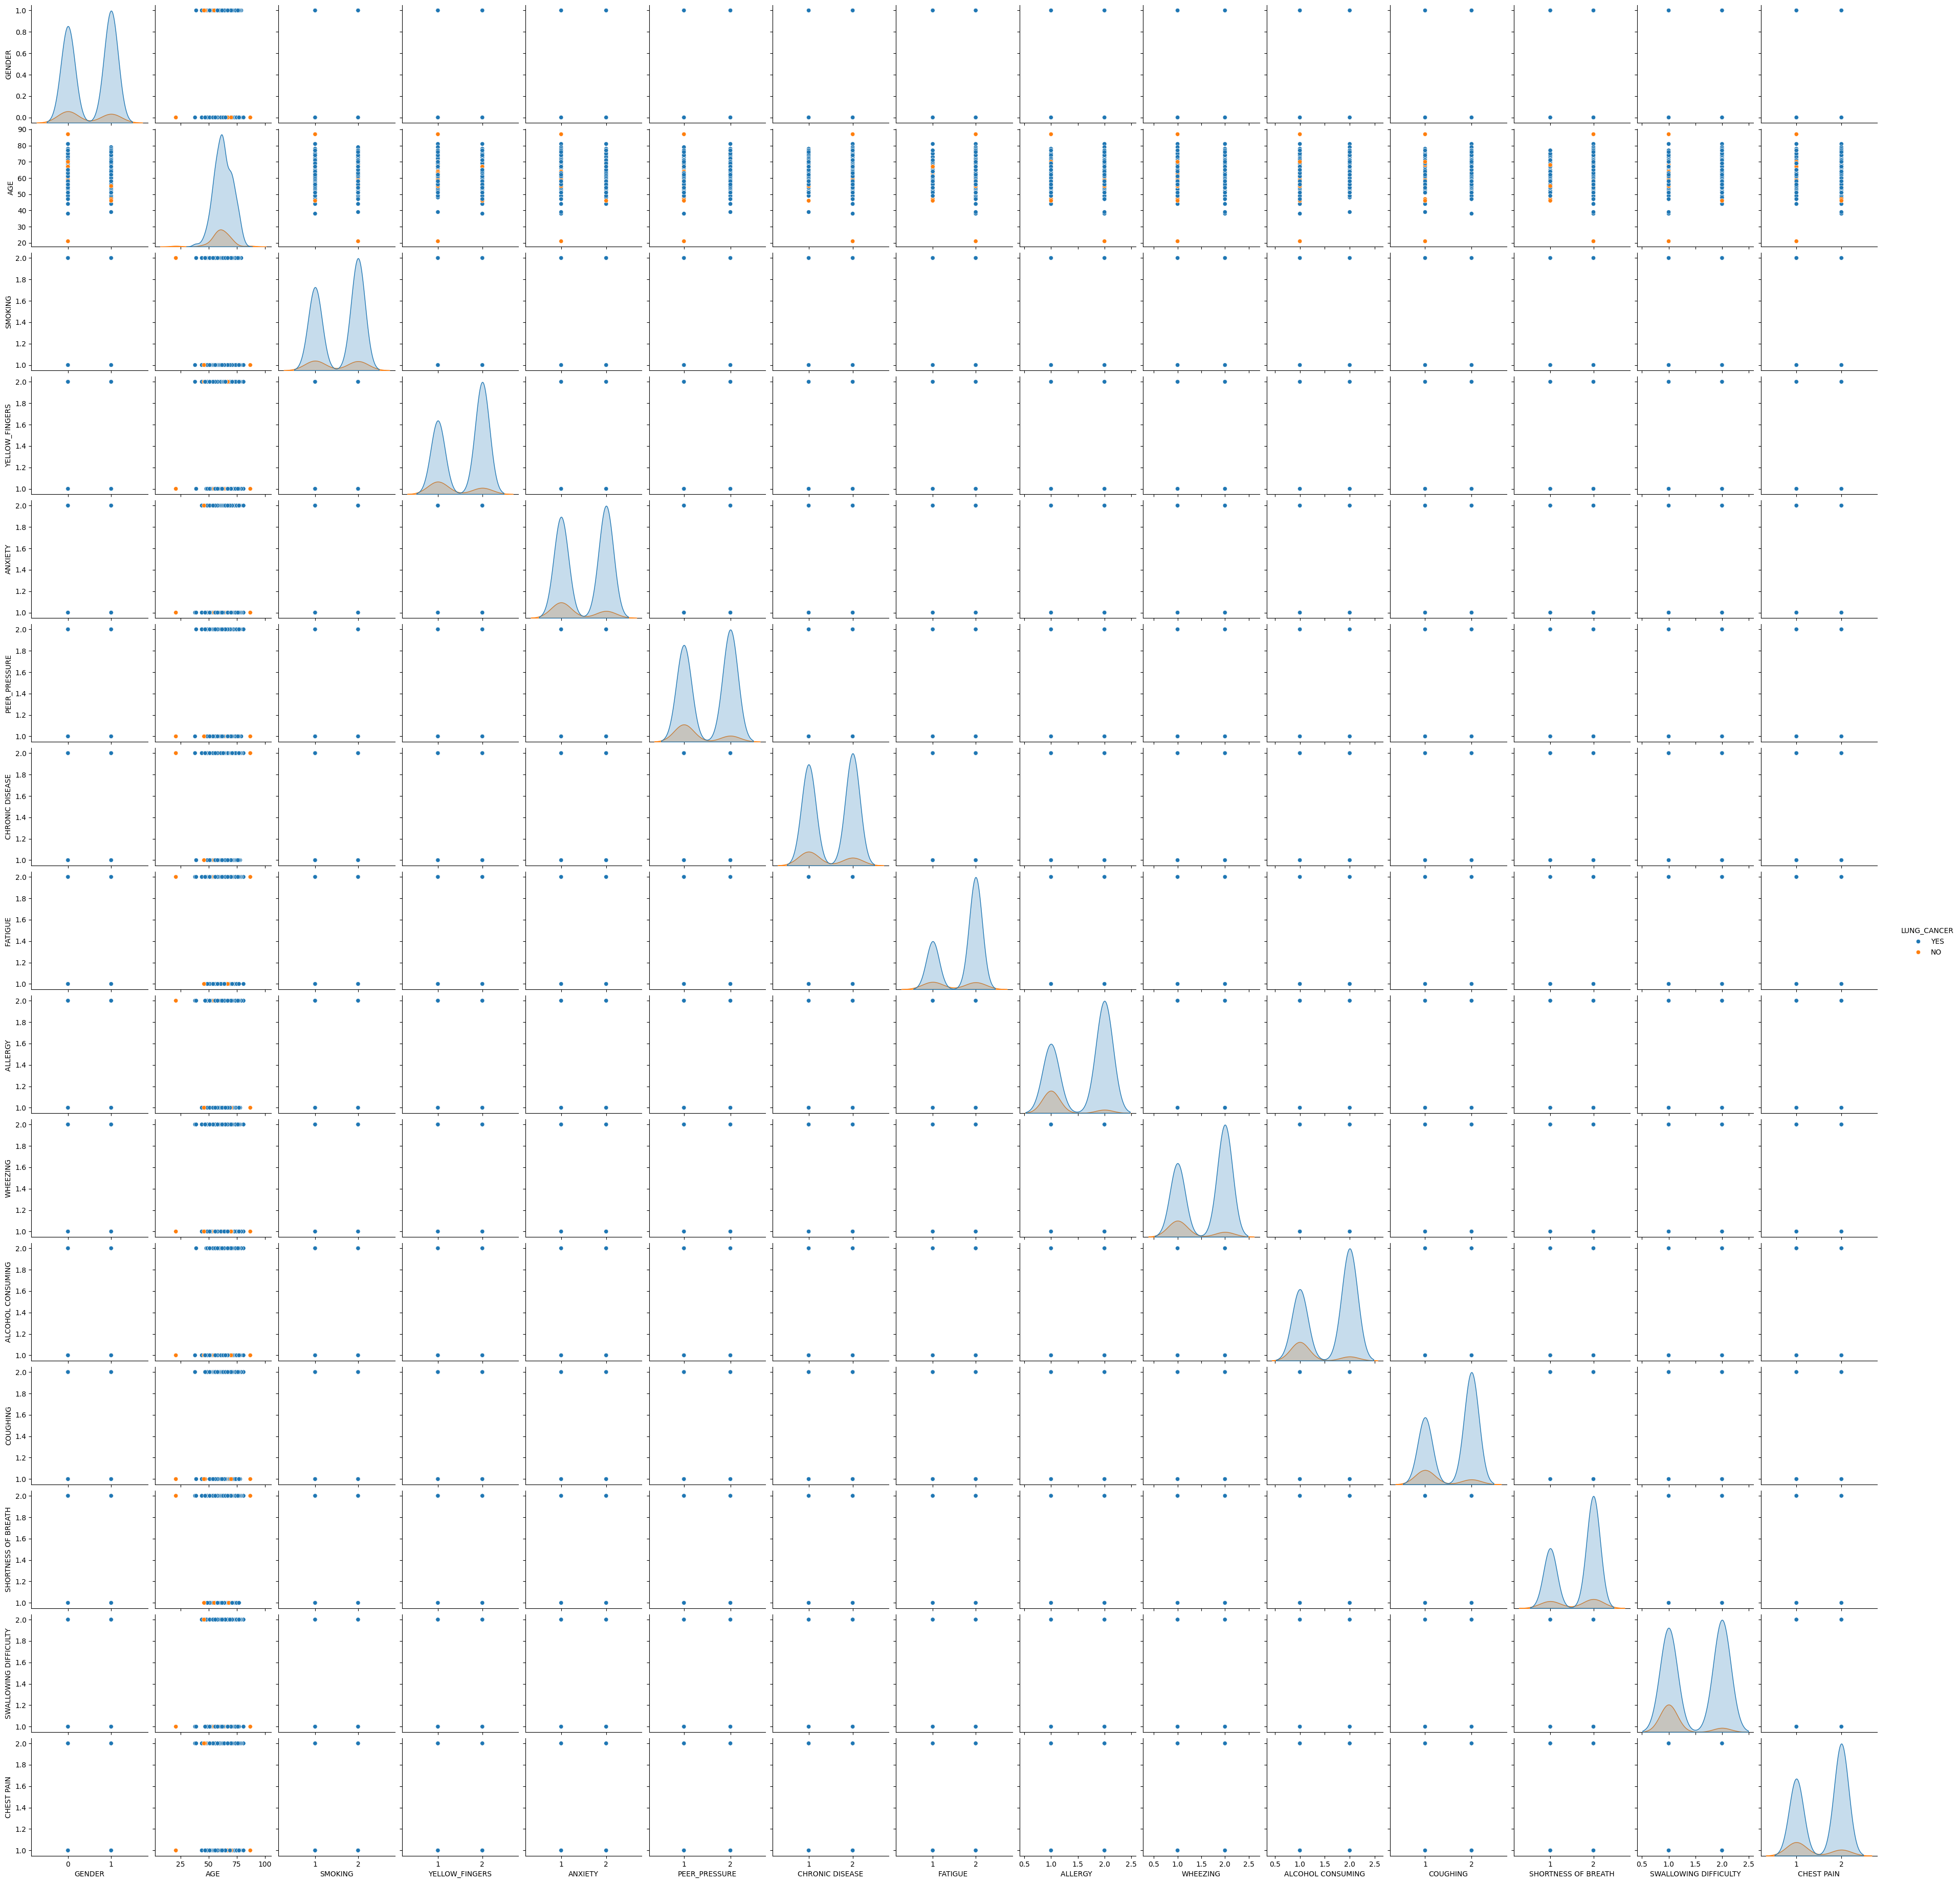

In [98]:
sns.pairplot(data, hue='LUNG_CANCER')
plt.show()

Ce graphique est assez peu lisible vu le gros nombre de différentes caractéristiques.

# Entrainement de différents modèles 

## Régression logistique

In [117]:
model = LogisticRegression()
# Entraîner le modèle
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_val)

# Évaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.9642857142857143
[[ 5  2]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.96      1.00      0.98        49

    accuracy                           0.96        56
   macro avg       0.98      0.86      0.91        56
weighted avg       0.97      0.96      0.96        56



Une très bonne accuracy pour ce modèle, mais on va essayer de l'améliorer avec un grid search.

In [100]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Exécuter GridSearchCV
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Prédictions
y_pred = best_model.predict(X_val)

# Évaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.9642857142857143
[[ 5  2]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.96      1.00      0.98        49

    accuracy                           0.96        56
   macro avg       0.98      0.86      0.91        56
weighted avg       0.97      0.96      0.96        56



C:\Users\vince\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vince\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vince\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vince\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: Conve

Malgré le grid_search on n'a pas d'amélioration visible, les meilleurs hyperparamètres étaient surement déjà sélectionnés de base.

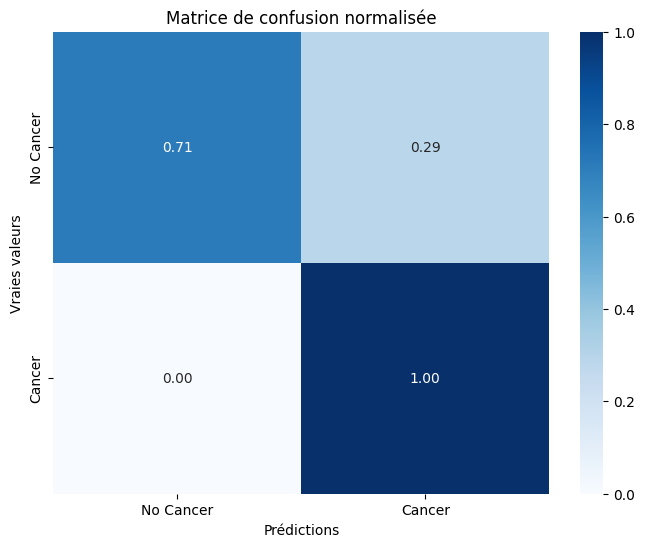

In [101]:
# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_val, y_pred)

# Normalisation de la matrice de confusion
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot de la matrice de confusion normalisée
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Matrice de confusion normalisée')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()

On print la matrice de confusion normalisée, pour une meilleure lisibilité. On voit effectivement que le modèle prédit très bien les cancers, mais a plus de mal lorsqu'il s'agit de prédire l'absence de cancer. Cela fait sens avec notre observation sur la répartition des classes dans le dataset.

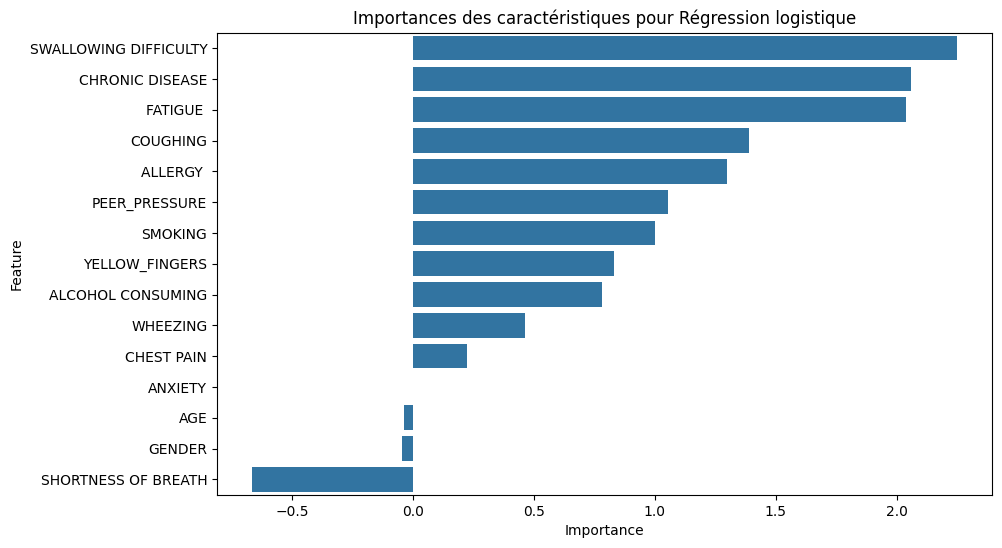

In [102]:
feature_importances = best_model.coef_[0]

# Associer les coefficients avec les noms des caractéristiques
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Trier les caractéristiques par importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importances des caractéristiques pour Régression logistique')
plt.show()

On affiche les features importantes. Cela permet de voir sur quoi le modèle s'est appuyé pour classifier. Il est à noter que nous avons essayé de supprimer les features qui semblaient inutiles, comme l'anxiété ici, mais cela a seulement conduit à une diminution des performances. Cette piste de réfléxion n'est donc pas montrée ici.

## RandomForest Classifier

In [103]:
# Définir le modèle
rf_model = RandomForestClassifier(random_state=42)

# Définir la grille de paramètres
param_grid = {
    'n_estimators': [100, 200, 300,400,500],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10, 12,14,16],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]

}

# Initialiser GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Exécuter GridSearchCV
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 840 candidates, totalling 4200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12, 14, 16],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy', verbose=2)

In [104]:
rf_best_model = grid_search.best_estimator_
rf_best_model.fit(X_train, y_train)

# Prédictions
y_pred = rf_best_model.predict(X_val)

# Évaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))



Accuracy: 0.9107142857142857
              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.92      0.98      0.95        49

    accuracy                           0.91        56
   macro avg       0.84      0.70      0.75        56
weighted avg       0.90      0.91      0.90        56



On obtient une précision de 91% pour le random forest classifier.

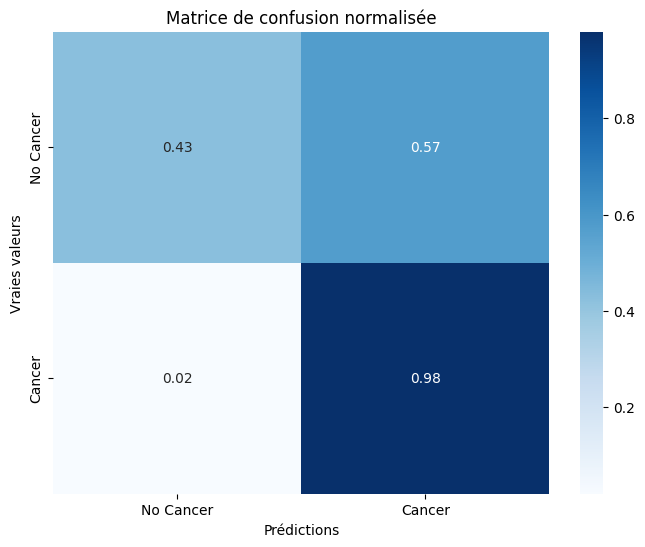

In [105]:
# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_val, y_pred)

# Normalisation de la matrice de confusion
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot de la matrice de confusion normalisée
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Matrice de confusion normalisée')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()

Encore une fois beaucoup de prédictions concernant l'absence de cancers érronées.

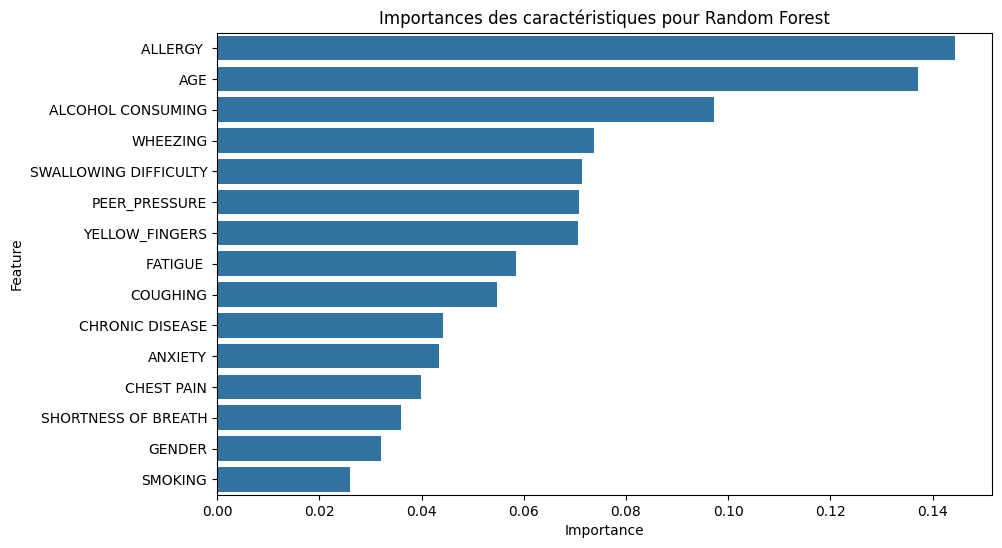

In [106]:
# Extraire les importances des caractéristiques
rf_feature_importances = rf_best_model.feature_importances_

# Associer les importances avec les noms des caractéristiques
feature_names = X.columns
rf_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_feature_importances})

# Trier les caractéristiques par importance
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df)
plt.title('Importances des caractéristiques pour Random Forest')
plt.show()

## SVM

In [107]:
svm_model = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100, 0.9, 1.3],
    'gamma': [1, 0.1, 0.01, 0.001, 0.9,1.1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 0.9, 1.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.9, 1.1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [108]:
# Entraîner le modèle avec les meilleurs paramètres
svm_best_model = grid_search.best_estimator_
svm_best_model.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear')

Accuracy: 0.9107142857142857
[[ 3  4]
 [ 1 48]]
              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.92      0.98      0.95        49

    accuracy                           0.91        56
   macro avg       0.84      0.70      0.75        56
weighted avg       0.90      0.91      0.90        56



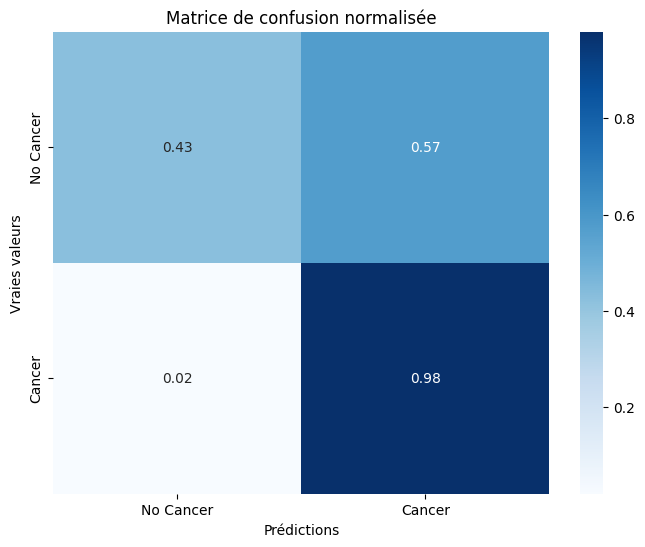

In [109]:
# Évaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_val, y_pred)

# Normalisation de la matrice de confusion
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot de la matrice de confusion normalisée
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Matrice de confusion normalisée')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()

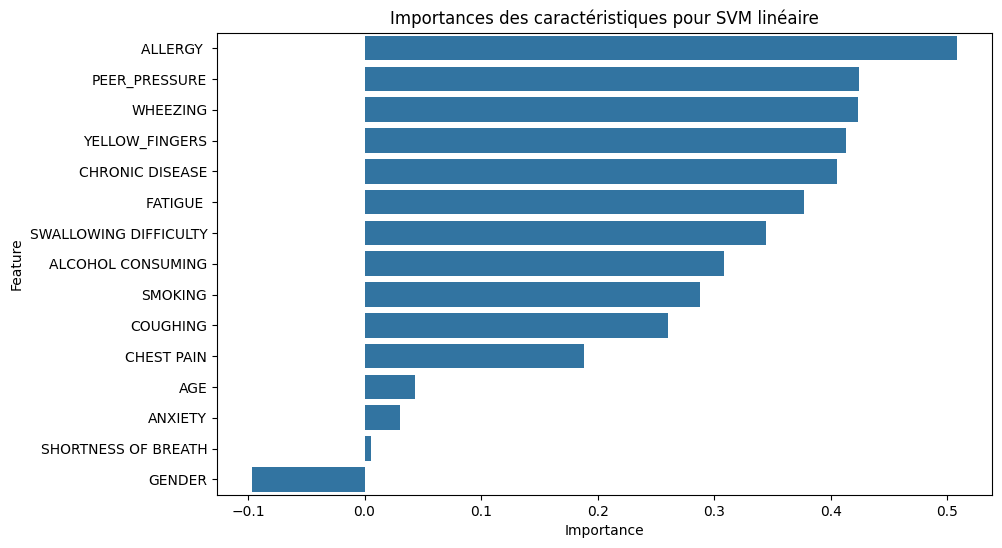

In [110]:
if grid_search.best_params_['kernel'] == 'linear':
    # Extraire les coefficients des caractéristiques
    svm_feature_importances = svm_best_model.coef_[0]

    # Associer les coefficients avec les noms des caractéristiques
    feature_names = X.columns
    svm_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': svm_feature_importances})

    # Trier les caractéristiques par importance
    svm_feature_importance_df = svm_feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=svm_feature_importance_df)
    plt.title('Importances des caractéristiques pour SVM linéaire')
    plt.show()

## KNN Classifier

In [111]:
# Définir le modèle
knn_model = KNeighborsClassifier()

# Définir la grille de paramètres
param_grid = {
    'n_neighbors': list(range(1, 20)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Exécuter GridSearchCV
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Best parameters found:  {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best accuracy found:  0.9145454545454544


In [112]:
knn_best_model = grid_search.best_estimator_
knn_best_model.fit(X_train, y_train)
y_pred = knn_best_model.predict(X_val)

Accuracy: 0.9107142857142857
[[ 3  4]
 [ 1 48]]
              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.92      0.98      0.95        49

    accuracy                           0.91        56
   macro avg       0.84      0.70      0.75        56
weighted avg       0.90      0.91      0.90        56



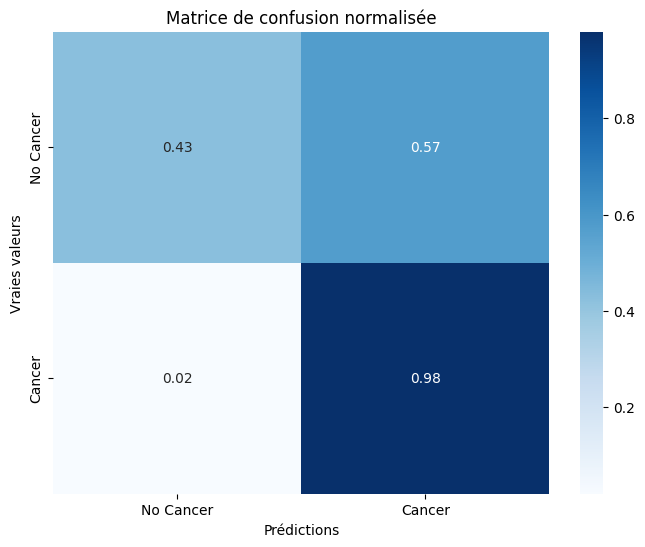

In [113]:
print("Accuracy:", accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_val, y_pred)

# Normalisation de la matrice de confusion
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot de la matrice de confusion normalisée
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Matrice de confusion normalisée')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()

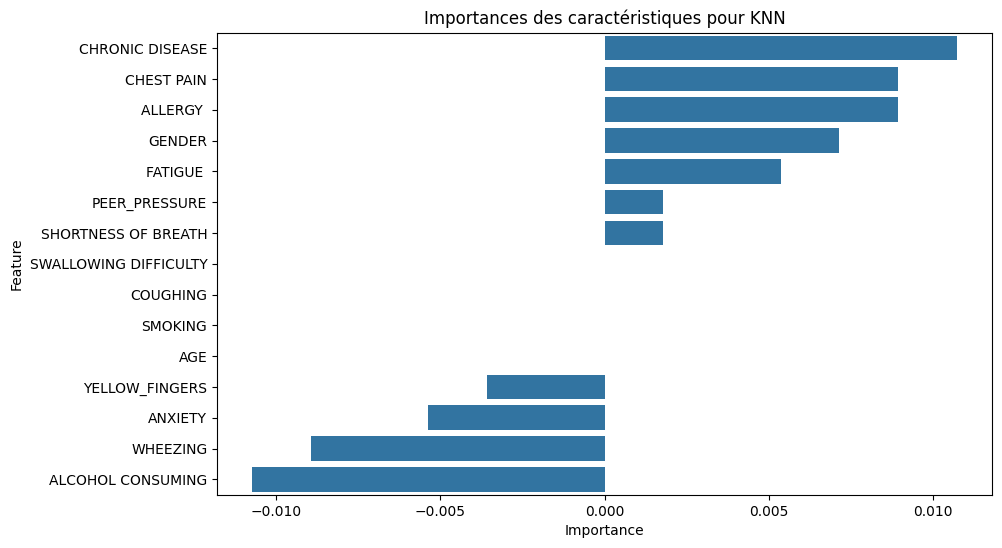

In [114]:
result = permutation_importance(knn_best_model, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1)

# Extraire les importances et les noms des caractéristiques
knn_feature_importances = result.importances_mean
feature_names = X.columns

# Associer les importances avec les noms des caractéristiques
knn_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': knn_feature_importances})

# Trier les caractéristiques par importance
knn_feature_importance_df = knn_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=knn_feature_importance_df)
plt.title('Importances des caractéristiques pour KNN')
plt.show()

## Calcul de la précision sur le modèle le plus performant : régression logistique

On teste l'accuracy finale sur le test set.

In [115]:
y_pred_test = best_model.predict(X_test)
print("Accuracy on test set:", accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


Accuracy on test set: 0.8709677419354839
[[ 3  1]
 [ 3 24]]
              precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.96      0.89      0.92        27

    accuracy                           0.87        31
   macro avg       0.73      0.82      0.76        31
weighted avg       0.90      0.87      0.88        31



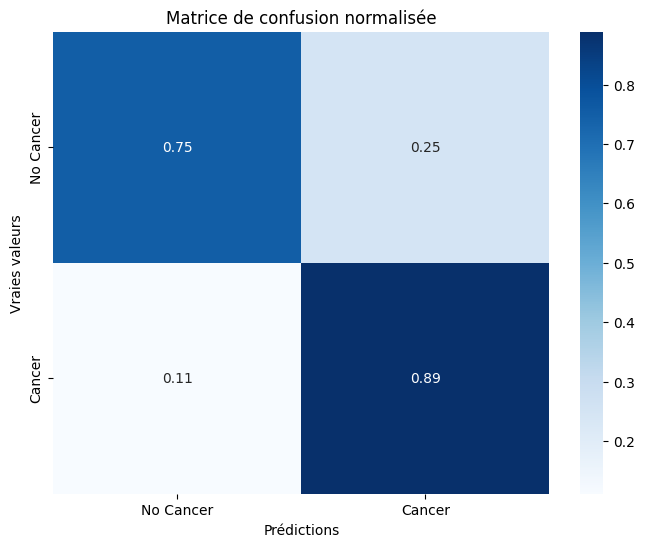

In [121]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Matrice de confusion normalisée')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()

D'après ce résultat, on peut voir que notre modèle nous donne des résultats plutôt précis pour estimer la probabilité qu'un patient soit sujet à un cancer du poumon ou non. Cette sensibilisation au cancer du poumon peut-être très utile, surtout au 21ème siècle avec la grande augmentation des cas de cancers.